In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set_palette('husl')
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
iris=load_iris()
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'])
species_dict={0.0:'Iris-setosa',1.0:'Iris-versicolor',2.0:'Iris-virginica'}
data['Species']=data['Species'].replace(species_dict)

In [7]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Species        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

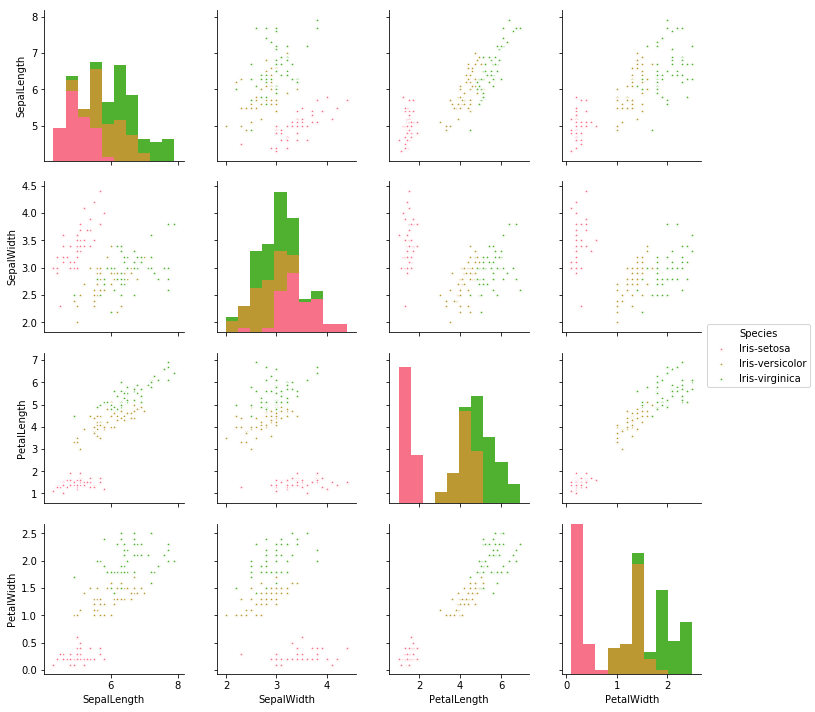

In [16]:
sns.pairplot(data,hue='Species',markers='*')

In [17]:
y=data['Species']
x=data.drop(['Species'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [18]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.92

In [19]:
conmat=metrics.confusion_matrix(y_test,y_pred)

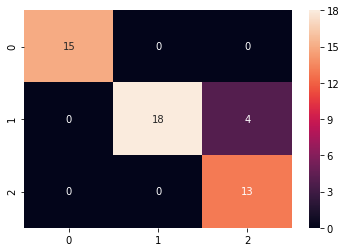

In [20]:
sns.heatmap(conmat,annot=True)

# Decision Tree Algo

In [21]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

In [28]:
from sklearn import tree
import graphviz
tree.export_graphviz(dtree,out_file='tree.dot')

with open('tree.dot') as f :
    dot_graph=f.read()
    
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH